In [51]:
import numpy as np
import pandas as pd

# Aula 01 - Utilização prática da Matriz Insumo Produto
Objetivos : 
* Principais conceitos da Matriz Insumo Produto
* 


In [1]:
from classes.mip import MIPCalculator


Mip = MIPCalculator('dados/MIP_2019_67_PCE.xlsx','dados/nivel_68_2010_2021_xls/68_tab2_2019.xls')

In [2]:
valor = Mip.detalhes_importacao.loc[72, 'Importação']*0.5


In [13]:
resultados = Mip.calculate_impactos(72,0.1)

In [14]:
resultados

{'Aumento PIB': array([2.03415134e+09]),
 'Aumento Produção': np.float64(1323202667.5343735),
 'Aumento Ocupações': np.float64(18259.222969871433),
 'Aumento Massa Salarial': np.float64(665076816.5332448),
 'Aumento Massa Salarial Ampliada': np.float64(769952108.853257)}

In [15]:
print(f'Massa salarial : {resultados['Aumento Massa Salarial']:.2f}')

Massa salarial : 665076816.53


In [16]:
print(f'Aumento no PIB : {resultados['Aumento PIB'][0]:.2f}')

Aumento no PIB : 2034151342.01


In [3]:
Mip.detalhes_importacao.shape

(126, 3)

In [4]:
Mip.detalhes_importacao

,Produção,Importação,Participação Importação
0,12631,7358,36.810246
1,43663,862,1.935991
2,18376,18,0.097858
3,57068,0,0.000000
4,153331,270,0.175780
...,...,...,...
121,45636,4992,9.860156
122,93816,0,0.000000
123,33107,0,0.000000
124,62283,0,0.000000


In [12]:
preco_antes,preco_depois = Mip.calcular_precos(80,aumento_imposto=2)

In [4]:
diff = Mip.calculate_differences(preco_antes, preco_depois)

In [5]:
Mip.show_top_differences(diff)

Setores com as maiores diferenças:
32
Setor Fabricação de automóveis, caminhões e ônibus, exceto peças: Diferença = 1.01
33
Setor Fabricação de peças e acessórios para veículos automotores: Diferença = 0.15
26
Setor Produção de ferro gusa/ferroligas, siderurgia e tubos de aço sem costura: Diferença = 0.04
24
Setor Fabricação de produtos de borracha e de material plástico: Diferença = 0.04
5
Setor Extração de minério de ferro, inclusive beneficiamentos e a aglomeração: Diferença = 0.03


In [5]:
preco_depois

array([1.23841312, 0.55194852, 0.52085434, 0.6755408 , 1.03724317,
       0.18673836, 0.40071663, 0.34455763, 0.31880344, 0.56632606,
       0.47481691, 0.57223414, 0.70258506, 0.44012552, 0.39070789,
       0.38524116, 0.63632681, 0.41545627, 2.48390888, 0.45883453,
       2.4535122 , 1.04097711, 0.46792599, 0.55207552, 0.96902916,
       0.5417769 , 0.9107778 , 0.80473754, 0.84556858, 1.23687626,
       0.73233401, 0.85498176, 0.32726043, 0.80283702, 0.96812382,
       0.42651387, 0.9826814 , 1.44972951, 0.52840358, 0.64567047,
       4.59035341, 1.99088253, 0.51791056, 0.49118427, 0.94114844,
       0.83316862, 0.62242273, 0.3508896 , 0.71534031, 0.66532583,
       0.95720049, 1.84817529, 0.51884036, 1.73160063, 0.82976823,
       0.87626445, 1.30486733, 1.47664388, 0.95479088, 0.78946702,
       0.8162465 , 0.80044548, 0.61242766, 0.55221757, 0.67919829,
       0.60881318, 1.        ])

# Extrair informações da MIP

In [8]:
#Produção total
V = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Recursos',skiprows=5,skipfooter=4,usecols=[*range(11,78)],header=None)
V = np.transpose(V)
#Impostos
Imp = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Recursos',skiprows=5,skipfooter=4,usecols=[9],header=None)
#Consumo intermediário produção nacional
Un = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Usos Nacional',skiprows=5,skipfooter=4,usecols=[*range(2,69)],header=None)
#Demanda Final Nacional
Fn = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Usos Nacional',skiprows=5,skipfooter=4,usecols=[*range(70,76)],header=None)

#Consumo intermediário produção importados
Um = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Usos Importado',skiprows=5,skipfooter=4,usecols=[*range(2,69)],header=None)
#Demanda Final Nacional importados
Fm = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Usos Importado',skiprows=5,skipfooter=4,usecols=[*range(70,76)],header=None)


In [9]:
Imp

,9
0,425
1,321
2,201
3,1398
4,470
...,...
121,7955
122,0
123,1393
124,859


# Extrair informações de impostos detalhados

In [10]:
#Impostos
Impostos_Detalhados = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Recursos',skiprows=5,skipfooter=4,usecols=[*range(5,9)],header=None)


In [11]:
Impostos_Detalhados.shape

(126, 4)

# Extrair informações da TRU


In [12]:
#Dados da TRU
planilha = pd.read_excel('./dados/nivel_68_2010_2021_xls/68_tab2_2019.xls',sheet_name='VA',skiprows=5,skipfooter=4,usecols=[*range(1,69)],header=None) # planilha VA
VAB = planilha.iloc[0,:].to_numpy()#Valor adicionado bruto
W = planilha.loc[1,:].to_numpy()#Remuneracoes
RMB = planilha.loc[8,:].to_numpy()#Rendimento misto bruto
Out_Imp = planilha.loc[10,:].to_numpy()# outros impostos e subsidios
Sub = planilha.loc[11,:].to_numpy()# outros impostos e subsidios
Imp_ou_sub = Out_Imp + Sub
VBP = planilha.iloc[12,:].to_numpy()#Valor bruto de produção
o = planilha.loc[13,:]# ocupações

#Matriz para agregação de 68 atividades em 67 da TRU
agg_68_67 = np.concatenate((np.eye(67,41),np.concatenate((np.zeros((40,27)),np.eye(27,27)))),axis=1)
#Transformação nas matrizes para 67 atividades
VAB = np.matmul(agg_68_67,VAB.transpose())
W = np.matmul(agg_68_67,W.transpose())
RMB = np.matmul(agg_68_67,RMB.transpose())
Out_Imp = np.matmul(agg_68_67,Out_Imp.transpose())
Sub = np.matmul(agg_68_67,Sub.transpose())
Imp_ou_sub = np.matmul(agg_68_67,Imp_ou_sub.transpose())
VBP = np.matmul(agg_68_67,VBP.transpose())

o = np.matmul(agg_68_67,o.transpose())


# Derivar informações da MIP

In [37]:
valor = Mip.detalhes_importacao.loc[1, 'Importação']*0.5
delta = np.zeros(Mip.V.shape[1])


In [38]:
delta[2] = valor

impacto_setorial =  Mip.D @ delta




In [39]:
Mip.L.shape

(67, 67)

In [40]:
impacto_total = Mip.L @ impacto_setorial

In [42]:
impacto_total.shape

(67,)

In [ ]:
g = np.matmul(V,np.ones(126)) ## Produção total por setor de atividade No caso da MIP estimada, o transporte aquaviário foi fundido com o terrestre de cargas
q = np.transpose(np.matmul(np.transpose(np.ones(67)),V)) ## Produção total por produto
D = np.matmul(V,np.linalg.inv(np.diag(q))) # participação do serviço/produto na produção total do setor

Bn = np.matmul(Un,np.linalg.inv(np.diag(g))) # participação do consumo intermediário nacional na produção nacional, por setor
A = np.matmul(D,Bn) # coeficientes técnicos intersetoriais nacionais
fn = np.matmul(Fn,np.transpose(np.ones(6))) # soma da demanda final
e = np.matmul(D,fn) #Demanda final ( nacional )

Bm = np.matmul(Um,np.linalg.inv(np.diag(g))) # consumo intermediário importado
Am = np.matmul(D,Bm) # coeficientes técnicos intersetoriais importados
Fm = np.matmul(Fm,np.transpose(np.ones(6))) # soma da demanda final importada
e_m = np.matmul(D,Fm) #Demanda final ( importada )


A_plus = np.matmul(D,Bn+Bm) # coeficientes técnicos ampliada ( contém insumos nacionais e importados )
L = np.linalg.inv(np.eye(A.shape[0])-A) # leontief
L_plus = np.linalg.inv(np.eye(A_plus.shape[0])-A_plus) # leontief expandida

l=np.matmul(np.linalg.inv(np.diag(g)),o)#Postos de trabalho por unidade (Milhão) de produção 



In [22]:
q

0       12631.0
1       43663.0
2       18376.0
3       57068.0
4      153331.0
         ...   
121     45636.0
122     93816.0
123     33107.0
124     62283.0
125     75158.0
Length: 126, dtype: float64

In [21]:
g

11    415308.0
12    163008.0
13     38200.0
14     20360.0
15    254621.0
        ...   
73    217052.0
74    324104.0
75     46576.0
76    185099.0
77     75158.0
Length: 67, dtype: float64

In [231]:
share_impostos = np.matmul(D,Impostos_Detalhados)
share_impostos.head(2)

,5,6,7,8
11,452.216018,76.615622,4794.850034,3070.977440
12,38.174084,58.089259,3175.733639,2414.158253


# Calcular dados para a economia após o aumento de imposto de importação


In [90]:
##Calcular a participação da importação do produto na produção total
DemandaTotalNacionalEImportado = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Recursos',skiprows=5,skipfooter=4,usecols=[78,79],header=None)
DemandaTotalNacionalEImportado['Participação Importação'] =DemandaTotalNacionalEImportado[79]/(DemandaTotalNacionalEImportado[78]+DemandaTotalNacionalEImportado[79])
DemandaTotalNacionalEImportado['Participação Importação']=DemandaTotalNacionalEImportado['Participação Importação']*100

In [92]:
#Share de importação por setor
total_importacao = np.matmul(D,DemandaTotalNacionalEImportado[79])

In [94]:
total_importacao.shape

(67,)

In [140]:
#Carregar dados de produção a preços de mercados
precos_mercado = pd.read_excel('./dados/MIP_2019_67_PCE.xlsx',sheet_name='Recursos',skiprows=5,skipfooter=4,usecols=[2],header=None)

In [143]:
precos_mercado = precos_mercado[2]

In [145]:
precos_mercado = np.matmul(D,precos_mercado)

In [232]:
#Calcular custo antes do aumento de imposto

#Remunerações + impostos + excedentes brutos
custo = W
custo = np.add(custo,share_impostos.sum(axis=1))
custo = np.add(custo,RMB)
custo = np.add(custo,Imp_ou_sub)
custo =np.add(total_importacao,custo)

#Custo por unidade de produção
custo = np.divide(custo,precos_mercado)




# Cálculo de preços

In [270]:
#Aumentar imposto de automóveis em 10% de 30% da produção
#share_impostos = np.matmul(D,Impostos_Detalhados)
participacao_setor = 1
aumento_imposto = 1
#Aumento de imposto de 10% em 30% da produção
Impostos_Detalhados_alterados = Impostos_Detalhados.copy()
Impostos_Detalhados_alterados.loc[80:82,5] = Impostos_Detalhados_alterados.loc[80:82,5]*(1.0+aumento_imposto*participacao_setor)

share_impostos_alterados = np.matmul(D,Impostos_Detalhados_alterados)



In [271]:
#Calcular custo antes do aumento de imposto
#produto

#Remunerações + impostos + excedentes brutos
custo = W
custo = np.add(custo,share_impostos.sum(axis=1))
custo = np.add(custo,RMB)
custo = np.add(custo,Imp_ou_sub)
custo =np.add(total_importacao,custo)

#Custo por unidade de produção
custo = np.divide(custo,precos_mercado)

#Calculo de preço
preco_antes_aumento = np.matmul(L_plus,custo)

#Calcular custo antes do aumento de imposto
#produto

#Remunerações + impostos + excedentes brutos
custo = W
custo = np.add(custo,share_impostos_alterados.sum(axis=1))
custo = np.add(custo,RMB)
custo = np.add(custo,Imp_ou_sub)
custo =np.add(total_importacao,custo)
#Custo por unidade de produção
custo = np.divide(custo,precos_mercado)



precos_depois_aumento = np.matmul(L_plus,custo)


In [272]:
preco_antes_aumento.sum()

np.float64(58.418683726728)

In [273]:
precos_depois_aumento.sum()

np.float64(58.47831926858764)

In [274]:
100*((precos_depois_aumento.sum()/preco_antes_aumento.sum())-1)

np.float64(0.10208299478058347)

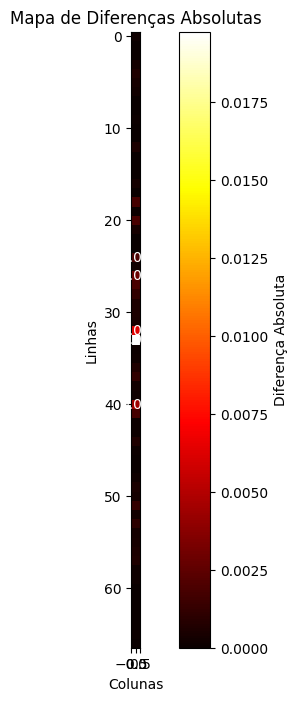

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
result = precos_depois_aumento / preco_antes_aumento

# Calcular a diferença absoluta entre os valores
difference = np.abs(precos_depois_aumento - preco_antes_aumento)
# Garantir que 'difference' seja uma matriz 2D
if len(difference.shape) == 1:
    difference = difference.reshape(-1, 1)  # Transformar em matriz 2D

# Identificar as posições com maior diferença
max_diff_positions = np.unravel_index(np.argsort(difference.ravel())[::-1], difference.shape)

# Visualizar as diferenças
plt.figure(figsize=(10, 8))
plt.imshow(difference, cmap='hot', interpolation='nearest')
plt.colorbar(label='Diferença Absoluta')
plt.title('Mapa de Diferenças Absolutas')
plt.xlabel('Colunas')
plt.ylabel('Linhas')

# Destacar as posições com maior diferença
for i in range(5):  # Exibir as 5 maiores diferenças
    y, x = max_diff_positions[0][i], max_diff_positions[1][i]
    plt.text(x, y, f'{difference[y, x]:.2f}', color='white', ha='center', va='center')

plt.show()

In [276]:
# Garantir que 'difference' seja uma matriz 2D
if len(difference.shape) == 1:
    difference = difference.reshape(-1, 1)  # Transformar em matriz 2D

# Identificar as posições com maior diferença
max_diff_positions = np.unravel_index(np.argsort(difference.ravel())[::-1], difference.shape)

# Mostrar os setores com as maiores diferenças
print("Setores com as maiores diferenças:")
for i in range(5):  # Exibir os 5 setores com maiores diferenças
    setor = max_diff_positions[0][i]
    valor_diferenca = difference[setor, 0]*100
    print(f"Setor {setor}: Diferença = {valor_diferenca:.2f}")

Setores com as maiores diferenças:
Setor 33: Diferença = 1.97
Setor 32: Diferença = 0.63
Setor 40: Diferença = 0.45
Setor 26: Diferença = 0.29
Setor 24: Diferença = 0.20


In [ ]:
#Aumentar imposto de automóveis em 10% de 30% da produção
#share_impostos = np.matmul(D,Impostos_Detalhados)
participacao_setor = 1
aumento_imposto = .2
#Aumento de imposto de 10% em 30% da produção
Impostos_Detalhados_alterados = Impostos_Detalhados.copy()
Impostos_Detalhados_alterados.loc[80:82,5] = Impostos_Detalhados_alterados.loc[80:82,5]*(1.0+aumento_imposto*participacao_setor)

share_impostos_alterados = np.matmul(D,Impostos_Detalhados_alterados)



/tmp/ipykernel_91150/2554422769.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2108.4  249.6 3642. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Impostos_Detalhados_alterados.loc[80:82,5] = Impostos_Detalhados_alterados.loc[80:82,5]*(1.0+aumento_imposto*participacao_setor)


In [258]:
#Calcular custo antes do aumento de imposto
#produto

#Remunerações + impostos + excedentes brutos
custo = W
custo = np.add(custo,share_impostos.sum(axis=1))
custo = np.add(custo,RMB)
custo = np.add(custo,Imp_ou_sub)
custo =np.add(total_importacao,custo)

#Custo por unidade de produção
custo = np.divide(custo,precos_mercado)

#Calculo de preço
preco_antes_aumento = np.matmul(L,custo)

#Calcular custo antes do aumento de imposto
#produto

#Remunerações + impostos + excedentes brutos
custo = W
custo = np.add(custo,share_impostos_alterados.sum(axis=1))
custo = np.add(custo,RMB)
custo = np.add(custo,Imp_ou_sub)
custo =np.add(total_importacao,custo)
#Custo por unidade de produção
custo = np.divide(custo,precos_mercado)



precos_depois_aumento = np.matmul(L,custo)


In [259]:
preco_antes_aumento.sum()

np.float64(48.649132802108575)

In [260]:
precos_depois_aumento.sum()

np.float64(48.65825077399409)

In [261]:
100*((precos_depois_aumento.sum()/preco_antes_aumento.sum())-1)

np.float64(0.018742311240371734)

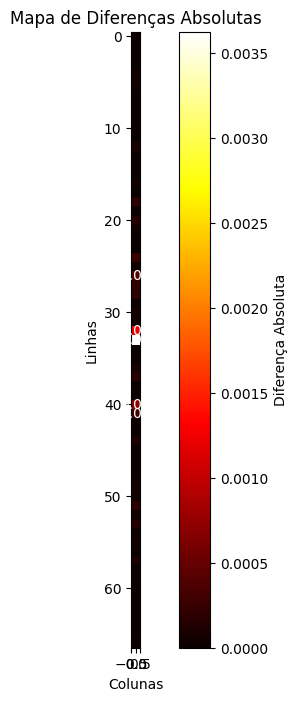

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
result = precos_depois_aumento / preco_antes_aumento

# Calcular a diferença absoluta entre os valores
difference = np.abs(precos_depois_aumento - preco_antes_aumento)
# Garantir que 'difference' seja uma matriz 2D
if len(difference.shape) == 1:
    difference = difference.reshape(-1, 1)  # Transformar em matriz 2D

# Identificar as posições com maior diferença
max_diff_positions = np.unravel_index(np.argsort(difference.ravel())[::-1], difference.shape)

# Visualizar as diferenças
plt.figure(figsize=(10, 8))
plt.imshow(difference, cmap='hot', interpolation='nearest')
plt.colorbar(label='Diferença Absoluta')
plt.title('Mapa de Diferenças Absolutas')
plt.xlabel('Colunas')
plt.ylabel('Linhas')

# Destacar as posições com maior diferença
for i in range(5):  # Exibir as 5 maiores diferenças
    y, x = max_diff_positions[0][i], max_diff_positions[1][i]
    plt.text(x, y, f'{difference[y, x]:.2f}', color='white', ha='center', va='center')

plt.show()

In [263]:
# Garantir que 'difference' seja uma matriz 2D
if len(difference.shape) == 1:
    difference = difference.reshape(-1, 1)  # Transformar em matriz 2D

# Identificar as posições com maior diferença
max_diff_positions = np.unravel_index(np.argsort(difference.ravel())[::-1], difference.shape)

# Mostrar os setores com as maiores diferenças
print("Setores com as maiores diferenças:")
for i in range(5):  # Exibir os 5 setores com maiores diferenças
    setor = max_diff_positions[0][i]
    valor_diferenca = difference[setor, 0]*100
    print(f"Setor {setor}: Diferença = {valor_diferenca:.2f}")

Setores com as maiores diferenças:
Setor 33: Diferença = 0.36
Setor 32: Diferença = 0.12
Setor 40: Diferença = 0.07
Setor 26: Diferença = 0.04
Setor 41: Diferença = 0.03


# Cálculo dos multiplicadores

In [10]:
w = np.matmul(np.linalg.inv(np.diag(g)),W) # participação de remuneracoes pela produção total, para cada atividade
wa = np.matmul(np.linalg.inv(np.diag(g)),W+RMB) # participação de remuneracoes pela produção total, para cada atividade

y=np.matmul(np.linalg.inv(np.diag(g)),VAB) # participação de valor agregado pela produção total, para cada atividade
tp=np.matmul(np.matmul(np.linalg.inv(np.diag(g)),D),Imp)#Divisão de impostos pelo market share de cada produto

to=np.matmul(np.matmul(np.diag(y),np.linalg.inv(np.diag(VAB))),Imp_ou_sub)#Outros impostos sobre a produção

tn = tp[8].to_numpy()+to #Total de impostos sobre produção nacional


In [11]:

massa_salarial = np.matmul(w.transpose(),np.matmul(L,e))
pib = np.matmul(np.matmul(y.transpose()+tp.transpose(),L),e.to_numpy())
Valor_Agregado = np.matmul(np.matmul(y.transpose(),L),e)

In [12]:
#Calcular o incremento de uma unidade (milhão) na atividade identificadada por 1 no vetor arr
arr = np.zeros(67)
arr[7]=1

print("Aumento no consumo intermediário importado de {:0.2f} ".format(np.matmul(np.ones(67),np.matmul(np.matmul(np.matmul(D,Bm),L),arr)*1000000)))#aumento de consumo intermediário importado
print("Aumento no valor agregado de produção de {:0.2f} ".format(np.matmul(np.matmul(y.transpose(),L),arr)*1000000))
print("Aumento no PIB de {:0.2f} ".format(np.matmul(np.matmul(y.transpose()+tp.transpose(),L),arr).values[0]*1000000))
print("Aumento nas ocupações (postos de trabalho) de {:0.2f} ".format(np.matmul(np.matmul(l,L),arr)))
print("Aumento na massa salarial de {:0.2f} ".format(np.matmul(np.matmul(w,L),arr)*1000000))
print("Aumento na massa salarial ampliada de {:0.2f} ".format(np.matmul(np.matmul(wa,L),arr)*1000000))

Aumento no consumo intermediário importado de 120591.27 
Aumento no valor agregado de produção de 792550.11 
Aumento no PIB de 855268.03 
Aumento nas ocupações (postos de trabalho) de 22.74 
Aumento na massa salarial de 364504.47 
Aumento na massa salarial ampliada de 508903.16 


# Cálculo dos multiplicadores para trás - Total

In [13]:
mul_prod = np.matmul(np.ones(67).transpose(),L)#Multiplicador para produção
mul_sal = np.matmul(w.transpose(),L)#multiplicador de remunerações
mul_sal_ajus = np.matmul(wa.transpose(),L)#multiplicador de remunerações ajustado
mul_imp = np.matmul(tp[8].transpose(),L)#multiplicador de impostos
mul_ocup = np.matmul(l.transpose(),L)#Multiplicador de ocupações


In [14]:
poder_dispersao = 67*mul_prod / np.matmul(np.matmul(np.ones(67).transpose(),L),np.ones(67).transpose()) #multiplicador de produção normalizado

In [15]:
#Bn = np.matmul(np.linalg.inv(np.diag(g)),D) # consumo intermediário nacional
#Sensibilidade de dispersão (Gosh)


B = np.matmul(np.matmul(np.linalg.inv(np.diag(g)),D),Un) #coeficientes técnicos a jusante
G = np.linalg.inv(np.eye(B.shape[0])-B) #matriz inversa de Gosh
mul_prod_jus = np.matmul(G,np.ones(67))
sensibilidade_dispersao = 67*mul_prod_jus / np.matmul(np.matmul(np.ones(67),G),np.ones(67)) #multiplicador a jusante normalizado
